# Holster Draw Analysis

This notebook analyzes holster draw timing data collected from MantisX training sessions. The analysis focuses on key timing metrics that break down the holster draw sequence into measurable components.

## Timing Metrics Definitions

The following timing metrics are analyzed in this notebook:

- **grip_time**: Time from the beep signal to the initial grip on the gun — measures reaction speed.
- **holster_pull_time**: Time from the beep until the gun is being pulled from the holster.
- **horizontal_time**: Time required to transition the gun to a horizontal, ready-to-aim position.
- **holster_target_time**: Time taken to push the gun out and align it on target after drawing.
- **horizontal_to_shot_time**: Time from the gun reaching target alignment to the actual shot.
- **holster_total_time**: Total time from the beep to the first shot — full draw and fire sequence.

These metrics help identify strengths and weaknesses in different phases of the holster draw, enabling targeted practice and improvement.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_dir = Path("data/holster_draw_analysis")
files = sorted(data_dir.glob("*.json"))  # Sort files to ensure chronological order

sessions = []
for file in files:
    with open(file) as f:
        content = json.load(f)
        sessions.append(content["session"])

df = pd.DataFrame(sessions)

In [3]:
# Extract timing data from shots
timing_data = []
for idx, row in df.iterrows():
  shots = row['shots']
  for shot in shots:
    timing_record = {
      'session_pk': row['pk'],
      'date': row['date'],
      'shot_pk': shot['pk'],
      'grip_time': shot.get('grip_time'),
      'holster_pull_time': shot.get('holster_pull_time'), 
      'horizontal_time': shot.get('horizontal_time'),
      'holster_target_time': shot.get('holster_target_time'),
      'horizontal_to_shot_time': shot.get('horizontal_to_shot_time'),
      'holster_total_time': shot.get('holster_total_time')
    }
    timing_data.append(timing_record)

timing_df = pd.DataFrame(timing_data)
print(f"Extracted {len(timing_df)} shots with timing data")
timing_df.sample(40)

Extracted 1478 shots with timing data


,session_pk,date,shot_pk,grip_time,holster_pull_time,horizontal_time,holster_target_time,horizontal_to_shot_time,holster_total_time
1466,29353547,2025-06-30T17:30:47.339848+00:00,350814899,0.20,0.17,0.26,0.00,0.21,0.84
134,29046047,2025-06-03T15:39:14.761609+00:00,346110469,0.28,0.11,0.27,0.00,0.24,0.90
1344,29329849,2025-06-28T15:27:50.148859+00:00,350465536,0.29,0.10,0.28,0.11,0.25,1.03
780,29205088,2025-06-17T17:41:21.416339+00:00,348518584,0.26,0.13,0.30,0.07,0.27,1.03
1251,29308035,2025-06-26T17:20:57.231862+00:00,350116802,0.28,0.08,0.28,0.07,0.22,0.93
952,29238590,2025-06-20T16:16:14.212005+00:00,349028752,0.31,0.09,0.25,0.02,0.23,0.90
179,29071662,2025-06-05T17:18:01.766133+00:00,346474878,0.28,0.10,0.28,0.00,0.26,0.92
420,29127267,2025-06-10T16:33:05.593643+00:00,347326011,0.25,0.00,0.39,0.02,0.23,0.89
39,29025313,2025-06-01T17:29:05.208540+00:00,345793580,0.26,0.10,0.25,0.03,0.26,0.90
1177,29284874,2025-06-24T18:14:58.051293+00:00,349774508,0.30,0.00,0.37,0.00,0.24,0.91


## Individual Timing Metrics Analysis

The following sections analyze each timing component individually, showing the progression over all shots and the median performance for each metric.

### Grip Time Analysis
**Reaction Speed**: Time from beep signal to initial grip on the gun.

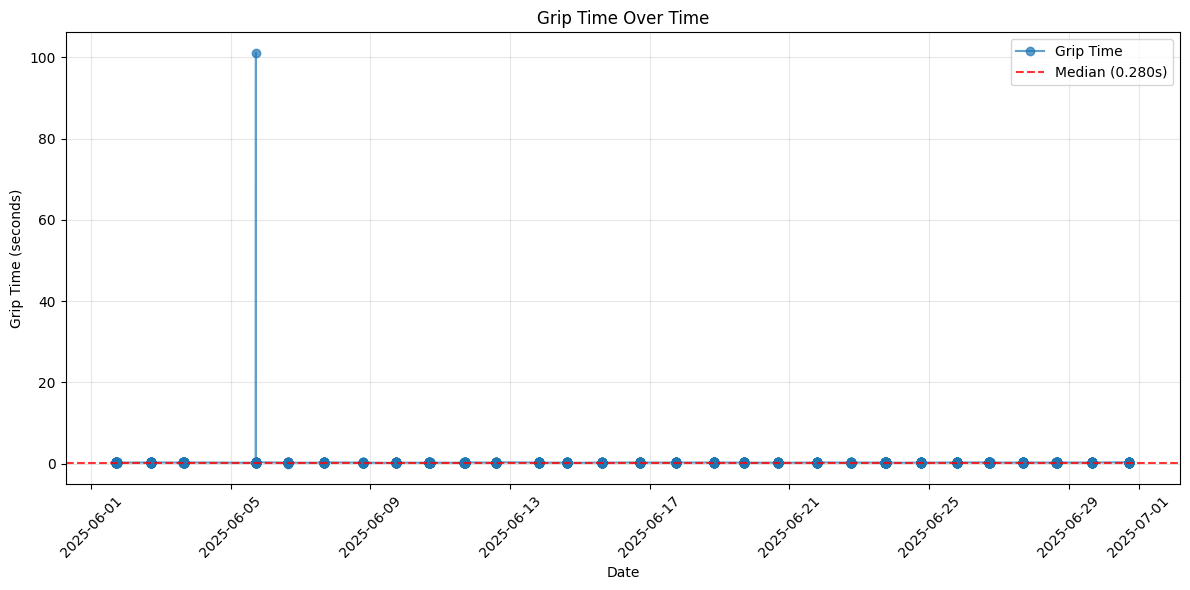

In [4]:
# Convert date strings to datetime and sort by date
timing_df['datetime'] = pd.to_datetime(timing_df['date'])
timing_df_sorted = timing_df.sort_values('datetime')

# Calculate median grip time
median_grip_time = timing_df_sorted['grip_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['grip_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Grip Time')
plt.axhline(y=median_grip_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_grip_time:.3f}s)')
plt.title('Grip Time Over Time')
plt.xlabel('Date')
plt.ylabel('Grip Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Holster Pull Time Analysis
**Holster Pull Time**: Time from beep until the gun is being pulled from the holster.

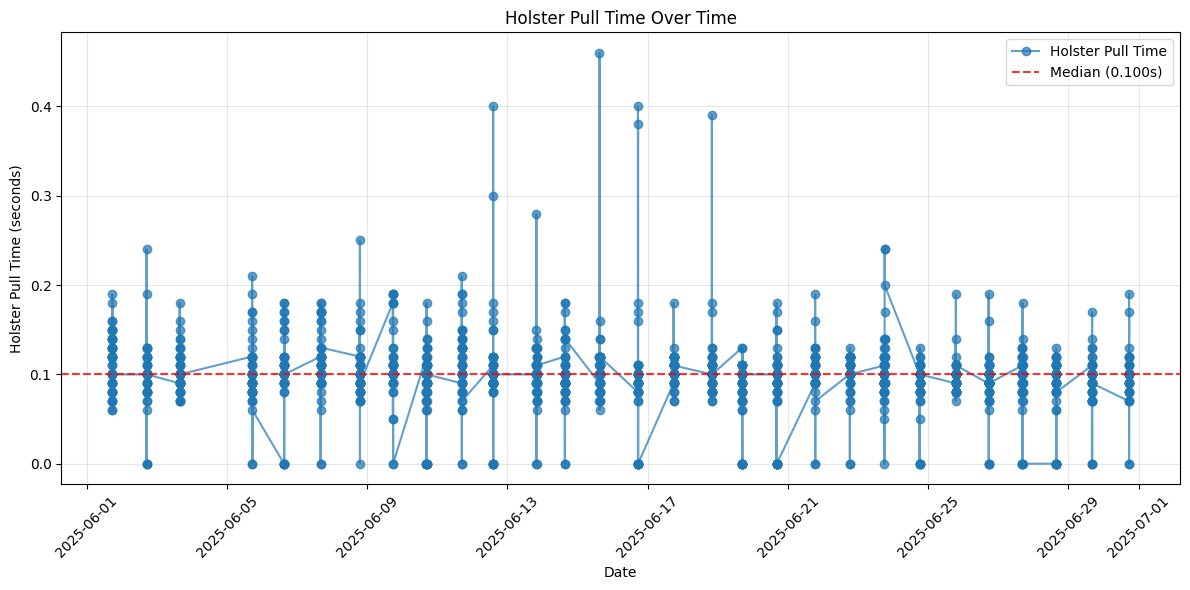

In [5]:
# Calculate median holster pull time
median_holster_pull_time = timing_df_sorted['holster_pull_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['holster_pull_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Holster Pull Time')
plt.axhline(y=median_holster_pull_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_holster_pull_time:.3f}s)')
plt.title('Holster Pull Time Over Time')
plt.xlabel('Date')
plt.ylabel('Holster Pull Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Horizontal Time Analysis
**Position Transition**: Time required to transition the gun to a horizontal, ready-to-aim position.

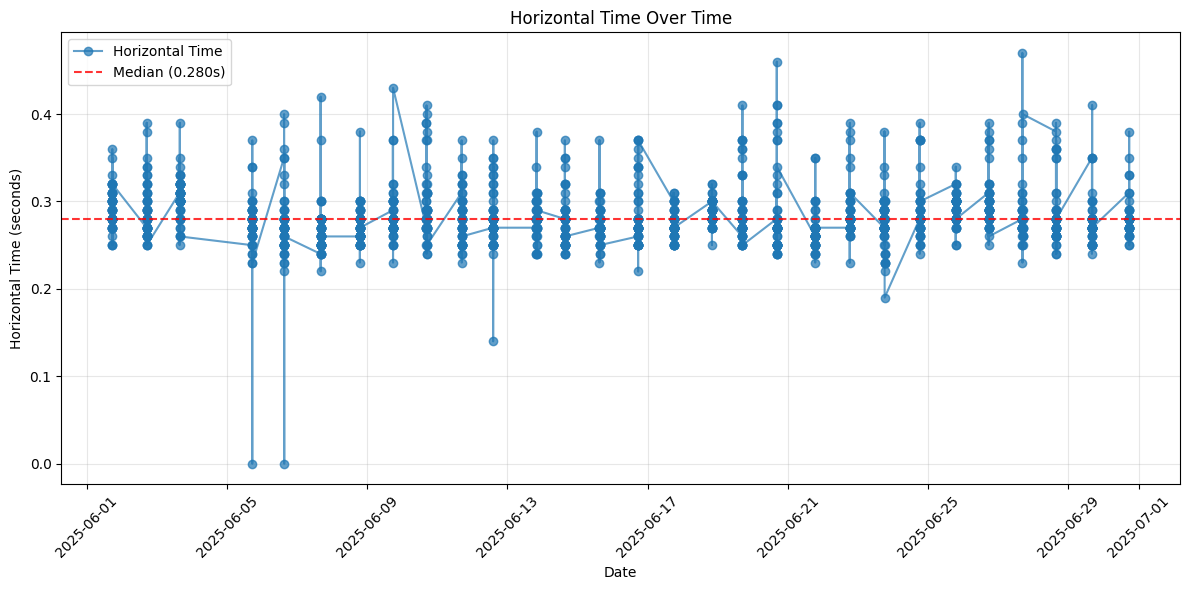

In [6]:
# Calculate median horizontal time
median_horizontal_time = timing_df_sorted['horizontal_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['horizontal_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Horizontal Time')
plt.axhline(y=median_horizontal_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_horizontal_time:.3f}s)')
plt.title('Horizontal Time Over Time')
plt.xlabel('Date')
plt.ylabel('Horizontal Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Holster Target Time Analysis
**Target Alignment**: Time taken to push the gun out and align it on target after drawing.

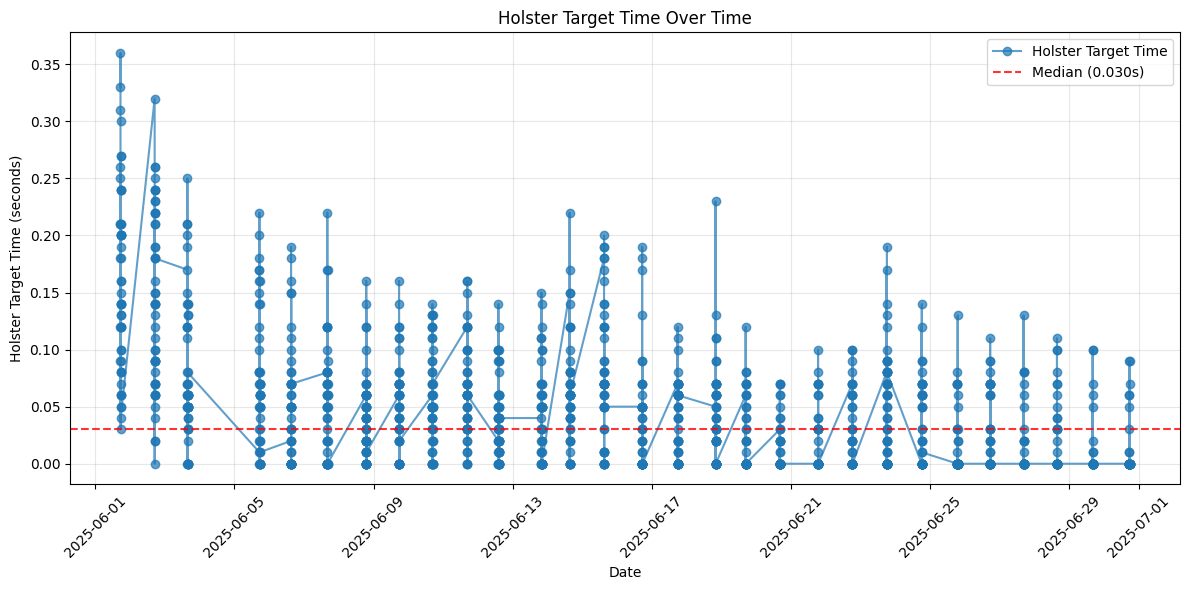

In [7]:
# Convert date strings to datetime and sort by date
timing_df['datetime'] = pd.to_datetime(timing_df['date'])
timing_df_sorted = timing_df.sort_values('datetime')

# Calculate median holster target time
median_holster_target_time = timing_df_sorted['holster_target_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['holster_target_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Holster Target Time')
plt.axhline(y=median_holster_target_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_holster_target_time:.3f}s)')
plt.title('Holster Target Time Over Time')
plt.xlabel('Date')
plt.ylabel('Holster Target Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Horizontal to Shot Time Analysis
**Shot Execution**: Time from the gun reaching target alignment to the actual shot.

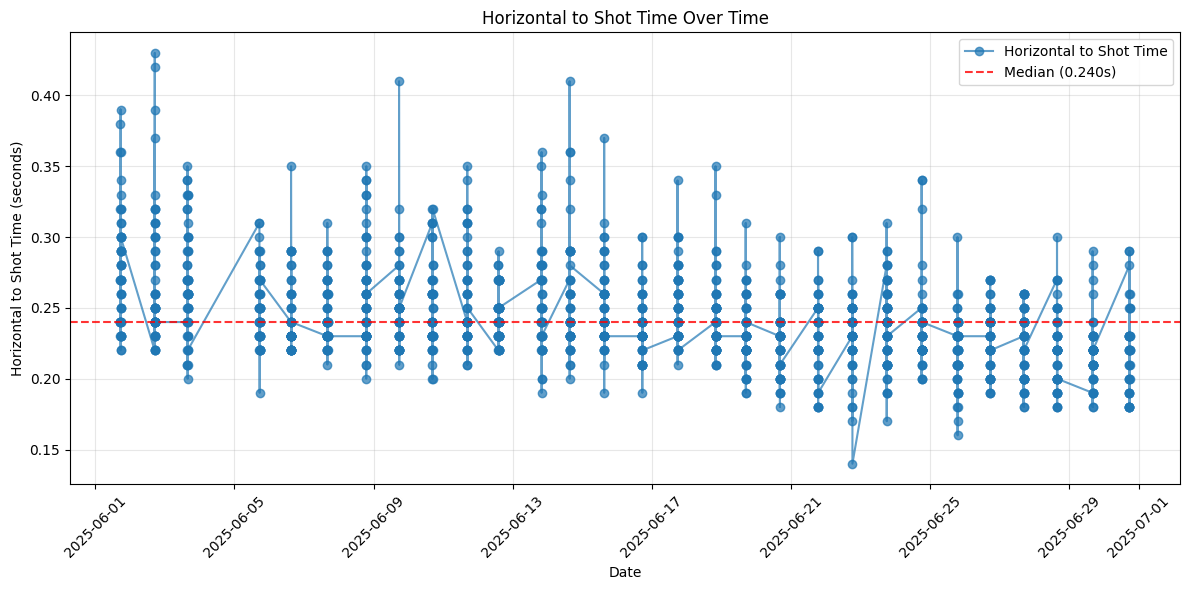

In [8]:
# Calculate median horizontal to shot time
median_horizontal_to_shot_time = timing_df_sorted['horizontal_to_shot_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['horizontal_to_shot_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Horizontal to Shot Time')
plt.axhline(y=median_horizontal_to_shot_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_horizontal_to_shot_time:.3f}s)')
plt.title('Horizontal to Shot Time Over Time')
plt.xlabel('Date')
plt.ylabel('Horizontal to Shot Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Holster Total Time Analysis
**Complete Performance**: Total time from beep to first shot — the full draw and fire sequence.

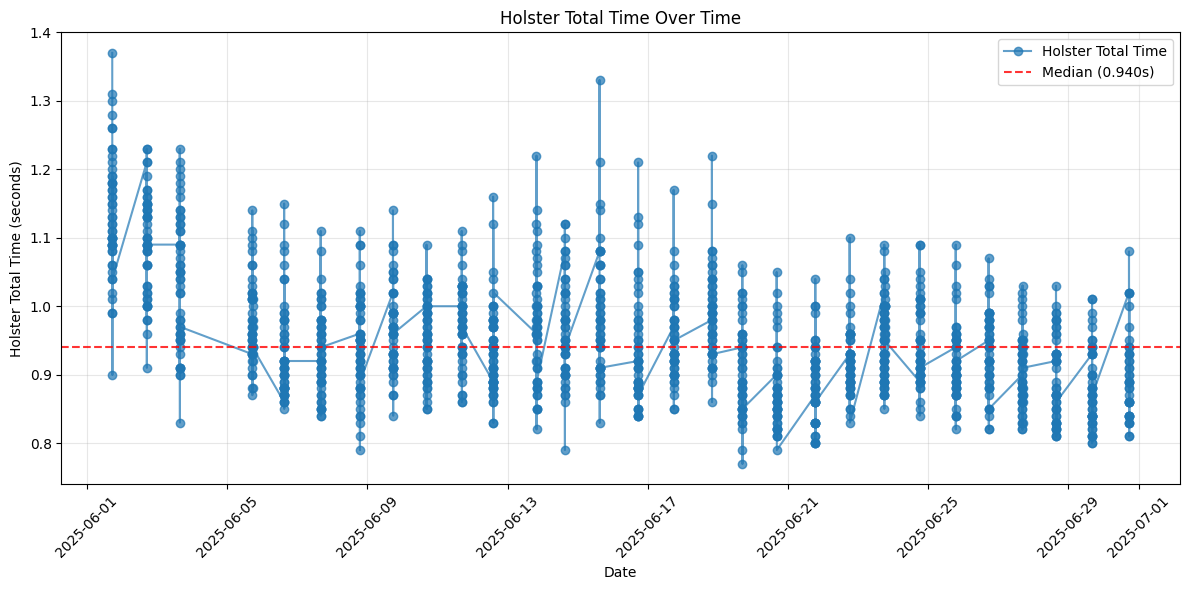

In [9]:
# Calculate median holster total time
median_holster_total_time = timing_df_sorted['holster_total_time'].median()

plt.figure(figsize=(12, 6))
plt.plot(timing_df_sorted['datetime'], timing_df_sorted['holster_total_time'], 
         marker='o', linestyle='-', alpha=0.7, label='Holster Total Time')
plt.axhline(y=median_holster_total_time, color='red', linestyle='--', alpha=0.8, 
            label=f'Median ({median_holster_total_time:.3f}s)')
plt.title('Holster Total Time Over Time')
plt.xlabel('Date')
plt.ylabel('Holster Total Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()